<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Data-Mining-Python/blob/main/20261_MD_1910_03_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://pastebin.com/nNgDpmMr
#Clasificacion la prueba vs la hipotesis

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris # datos de iris
from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Bravo Tecorral Alan Daniel
#Creamos y entrenamos nuestro modelo de clasificacion
#Posteriormente se evaluaron las probabilidades para cada caso y se etiquetaron

In [ ]:
iris= load_iris ()
irisdf =pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['specie']=iris.target
irisdf.head()
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Separar el dataframe para entrenamiento y prueba (más casos de entrenamiento que de pruebas)
X_train, X_test, y_train, y_test = train_test_split(
irisdf.drop('specie', axis=1), irisdf ['specie'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [ ]:
y_train

,specie
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


In [ ]:
#crear y entrenar el modelo de clasificacion
treeclass = DecisionTreeClassifier (max_depth=2, random_state=42) #La profundidad maxima determina las ramificaciones
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

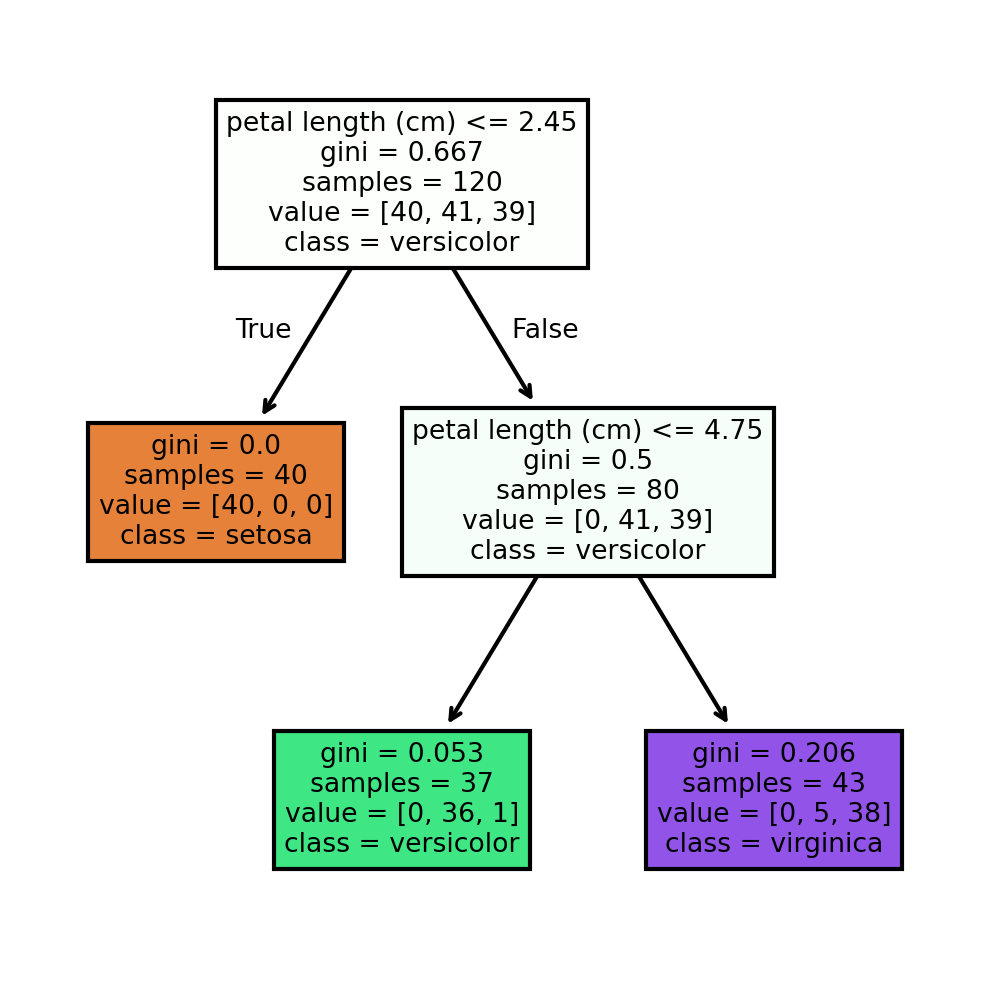

In [ ]:
#visualizar el arbol
fn = iris.feature_names
cn= iris.target_names
fig, axes = plt.subplots(nrows =1, ncols=1, figsize=(4,4), dpi=300)

tree.plot_tree(treeclass,
              feature_names = fn,
              class_names = cn,
              filled = True);
#GINI Que tan puro es mi nodo Mientras más cercano al 0 es más puro

In [ ]:
#Evaluar el modelo con los datos de entrenamiento
print("Acc: ", format(treeclass.score(X_train, y_train)))

Acc:  0.95


In [ ]:
def metrics_score(actual, predicted, labels=None):
    print("\nReporte de clasificación:")
    print(metrics.classification_report(actual, predicted, target_names=labels if labels is not None else None))

    cm = metrics.confusion_matrix(actual, predicted)
    print("\nMatriz de confusión:")
    print(cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=labels if labels is not None else sorted(set(actual)),
                yticklabels=labels if labels is not None else sorted(set(actual)),
                cmap="Blues")
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.title('Matriz de Confusión')
    plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Matriz de confusión:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


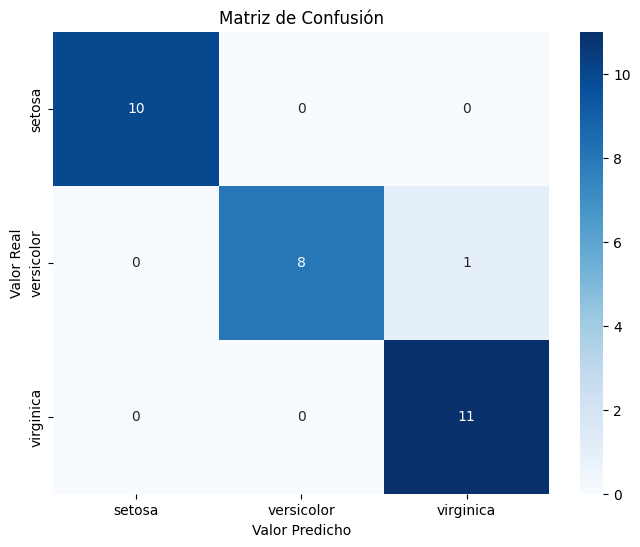

In [ ]:
#Probar y evaluar el modelo
Y_pred = treeclass.predict(X_test)
metrics_score(y_test, Y_pred, labels= iris.target_names)

In [ ]:
Y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print (y_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: specie, dtype: int64


In [ ]:
print ('Accuracy del modelo: {}'. format(metrics.accuracy_score(y_test, Y_pred)))
print ('Precicion score {}'. format(metrics.precision_score(y_test, Y_pred, average='macro')))


Accuracy del modelo: 0.9666666666666667
Precicion score 0.9722222222222222


In [ ]:
#Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(treeclass, irisdf.drop('specie', axis=1), irisdf['specie'], cv=kfold, scoring='accuracy')
print(scores)
print ('Accuracy promedio:{}'.format(scores.mean()))

[0.96666667 0.96666667 0.93333333 0.93333333 0.93333333]
Accuracy promedio:0.9466666666666667


In [ ]:
Y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print (treeclass.predict_proba(X_test)) #Probabilidades de etiquetar 0-1-2

[[0.         0.97297297 0.02702703]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88

In [ ]:
irisnl = pd.read_csv('https://raw.githubusercontent.com/omarmendoza564/datos/refs/heads/main/datos/iris_dataset_sintetico.csv')
irisnl.drop('id', axis=1, inplace=True)
irisnl

,sepal_length,sepal_width,petal_length,petal_width
0,6.17,4.03,3.98,1.24
1,5.57,3.15,4.84,0.51
2,6.03,2.15,1.15,2.43
3,7.48,2.83,4.18,0.73
4,6.83,4.39,4.82,0.43
...,...,...,...,...
295,6.11,3.76,6.12,1.34
296,4.46,2.37,4.27,2.50
297,4.93,2.82,6.66,1.55
298,7.69,3.75,6.77,0.11


In [ ]:
X = np.array(irisnl)
X

array([[6.17, 4.03, 3.98, 1.24],
       [5.57, 3.15, 4.84, 0.51],
       [6.03, 2.15, 1.15, 2.43],
       ...,
       [4.93, 2.82, 6.66, 1.55],
       [7.69, 3.75, 6.77, 0.11],
       [5.2 , 2.03, 5.89, 1.43]])

In [ ]:
print (treeclass.predict_proba(X))

[[0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.11627907 0.88372093]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [1.         0.         0.        ]
 [0.         0.97297297 0.02702703]
 [0.         0.97297297 0.02702703]
 [1.         0.         0.  

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
Y = treeclass.predict(X)
Y

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0,
       0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2])

In [ ]:
irisnl ['specie'] = Y
irisnl ['specie'].replace({0:'Iris_Setosa', 1:'Iris_Versicolor', 2:'Iris_Virginica'}, inplace=True)
irisnl

/tmp/ipython-input-914225188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  irisnl ['specie'].replace({0:'Iris_Setosa', 1:'Iris_Versicolor', 2:'Iris_Virginica'}, inplace=True)


,sepal_length,sepal_width,petal_length,petal_width,specie
0,6.17,4.03,3.98,1.24,Iris_Versicolor
1,5.57,3.15,4.84,0.51,Iris_Virginica
2,6.03,2.15,1.15,2.43,Iris_Setosa
3,7.48,2.83,4.18,0.73,Iris_Versicolor
4,6.83,4.39,4.82,0.43,Iris_Virginica
...,...,...,...,...,...
295,6.11,3.76,6.12,1.34,Iris_Virginica
296,4.46,2.37,4.27,2.50,Iris_Versicolor
297,4.93,2.82,6.66,1.55,Iris_Virginica
298,7.69,3.75,6.77,0.11,Iris_Virginica


In [ ]:
print ('Distribucion de la specie en el dataset sintetico')
irisnl ['specie'].value_counts()

Distribucion de la specie en el dataset sintetico


,count
specie,
Iris_Versicolor,116
Iris_Virginica,103
Iris_Setosa,81


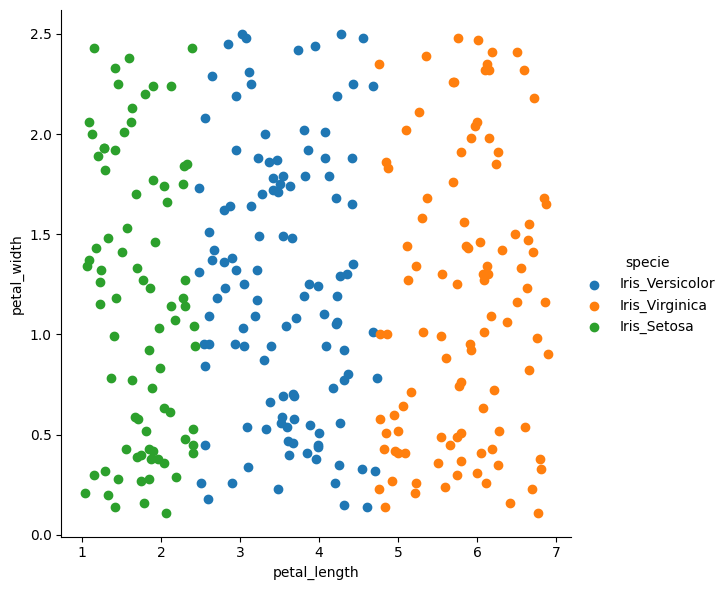

In [ ]:
sns.FacetGrid(irisnl, hue ='specie', height =6)\
.map(plt.scatter, 'petal_length', 'petal_width')\
.add_legend()


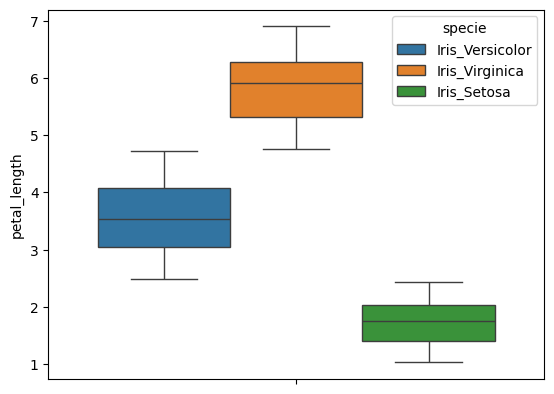

In [ ]:
#Boxplot
sns.boxplot(hue='specie', y='petal_length', data=irisnl)
plt.show()